,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
date,,,,,,,,,,,,,,,
2020-11-01,08:00,BE,NaN,14263.0,NaN,NaN,NaN,NaN,NaN,133.0,https://www.besondere-lage.sites.be.ch/besonde...,NaN,NaN,NaN,NaN
2020-11-01,08:00,TI,NaN,7892.0,NaN,168.0,11.0,8.0,1002.0,367.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...,353.0,1139.0,NaN,NaN
2020-11-01,08:00,ZG,NaN,1814.0,NaN,29.0,4.0,NaN,1274.0,11.0,https://www.zg.ch/behoerden/gesundheitsdirekti...,NaN,NaN,NaN,NaN
2020-11-01,09:00,SZ,NaN,3142.0,NaN,NaN,NaN,NaN,1602.0,53.0,https://www.sz.ch/public/upload/assets/49476/C...,NaN,NaN,NaN,NaN
2020-11-01,09:35,BS,NaN,2653.0,NaN,66.0,16.0,NaN,1800.0,54.0,https://www.gesundheit.bs.ch,799.0,2106.0,NaN,NaN
2020-11-01,10:00,TG,NaN,3184.0,4.0,40.0,7.0,NaN,150.0,33.0,https://www.tg.ch/news/fachstab-gesundheit-cor...,NaN,NaN,NaN,NaN
2020-11-01,14:30,ZH,NaN,23376.0,NaN,258.0,NaN,31.0,NaN,187.0,https://www.zh.ch/de/gesundheit/coronavirus.html,NaN,NaN,NaN,NaN
2020-11-02,NaN,BL,NaN,3093.0,NaN,33.0,5.0,4.0,1824.0,43.0,https://www.baselland.ch/politik-und-behorden/...,1105.0,794.0,NaN,NaN
2020-11-02,NaN,FL,NaN,631.0,NaN,12.0,NaN,NaN,379.0,3.0,https://www.llv.li/files/ag/aktuelle-fallzahle...,NaN,NaN,NaN,NaN


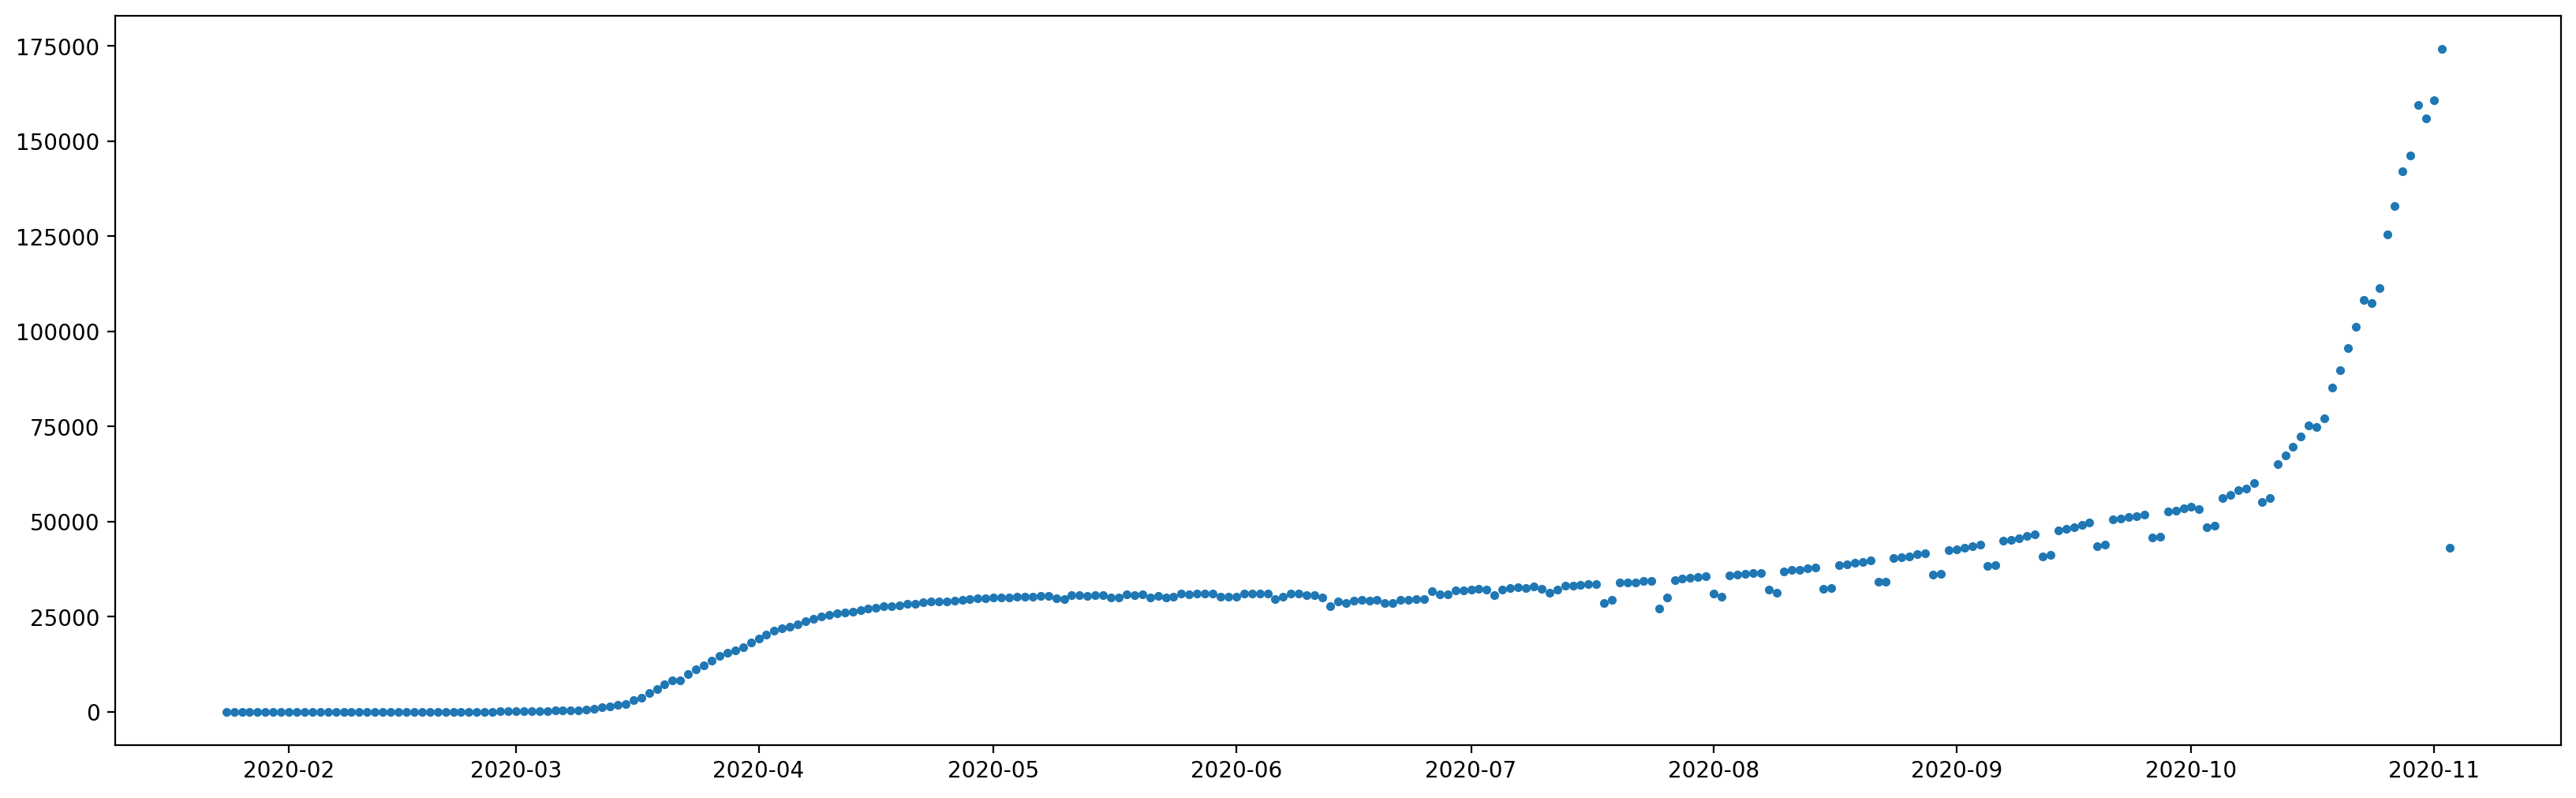

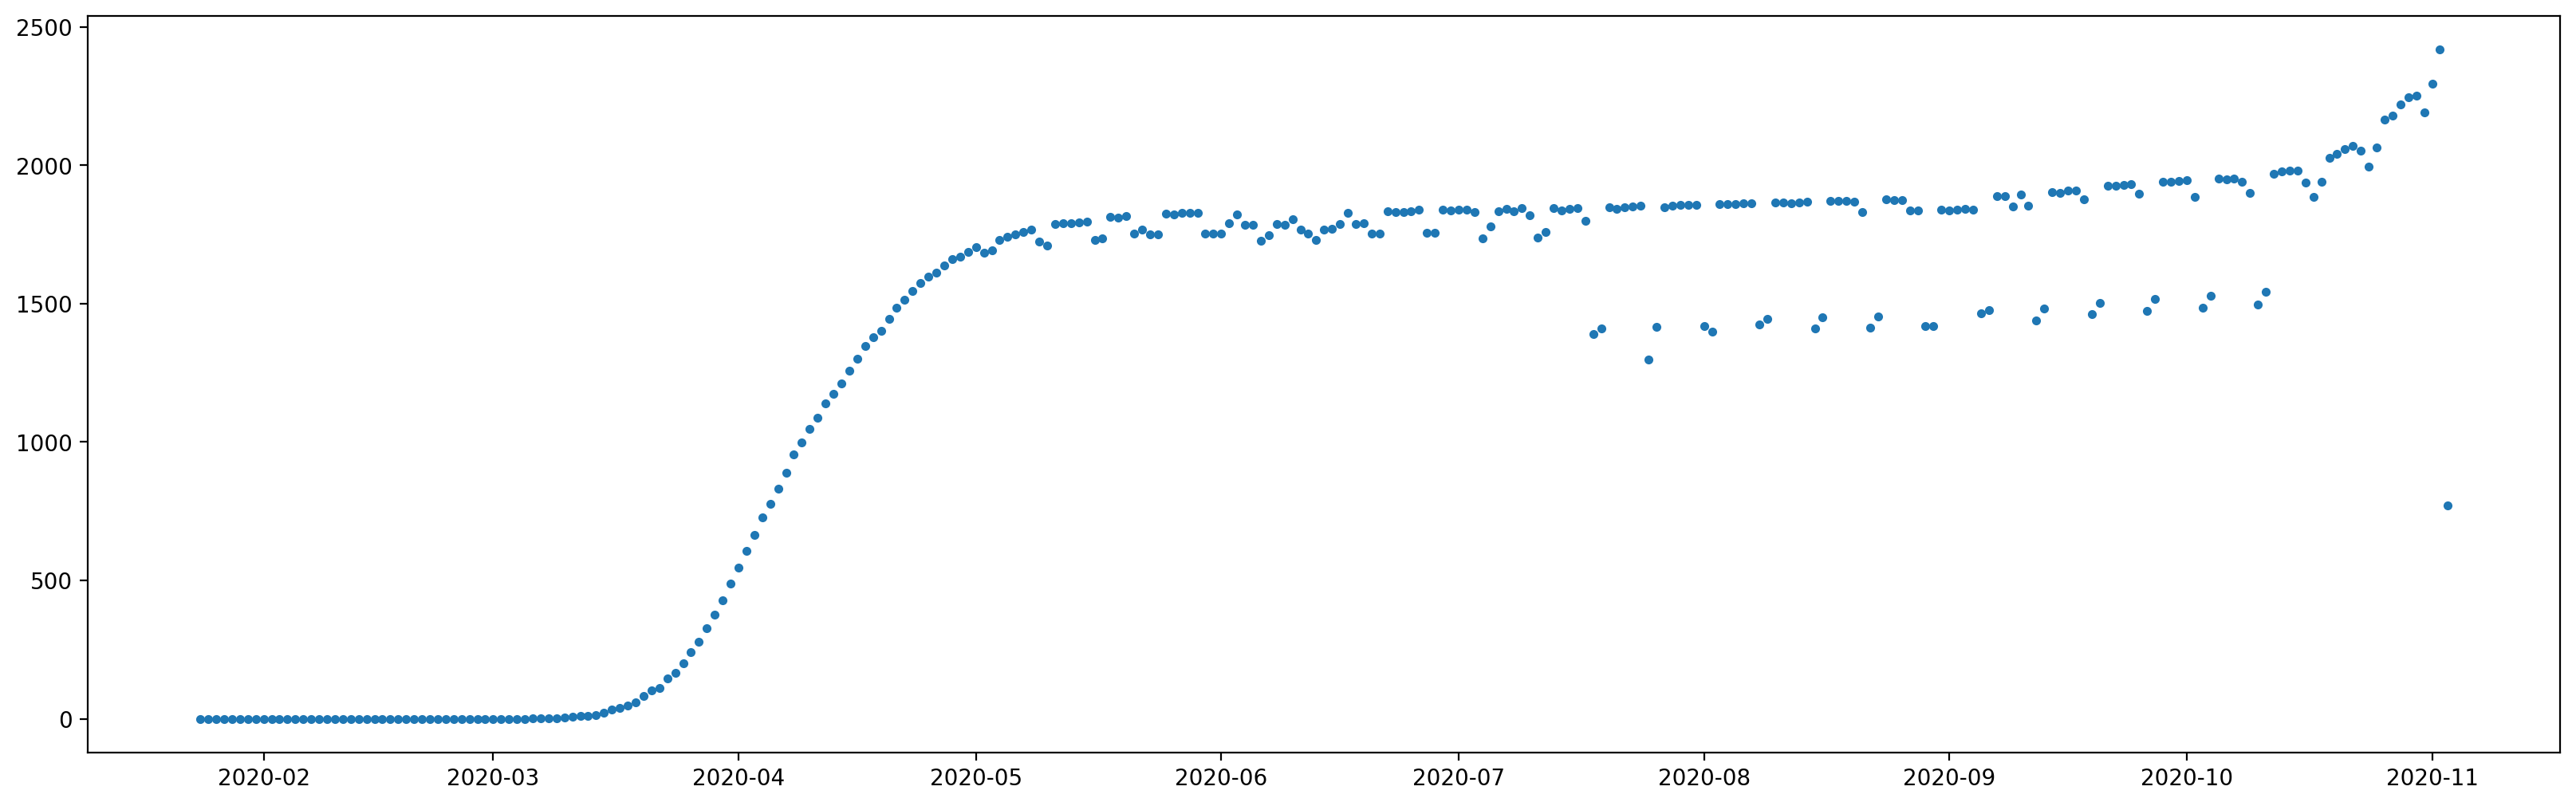

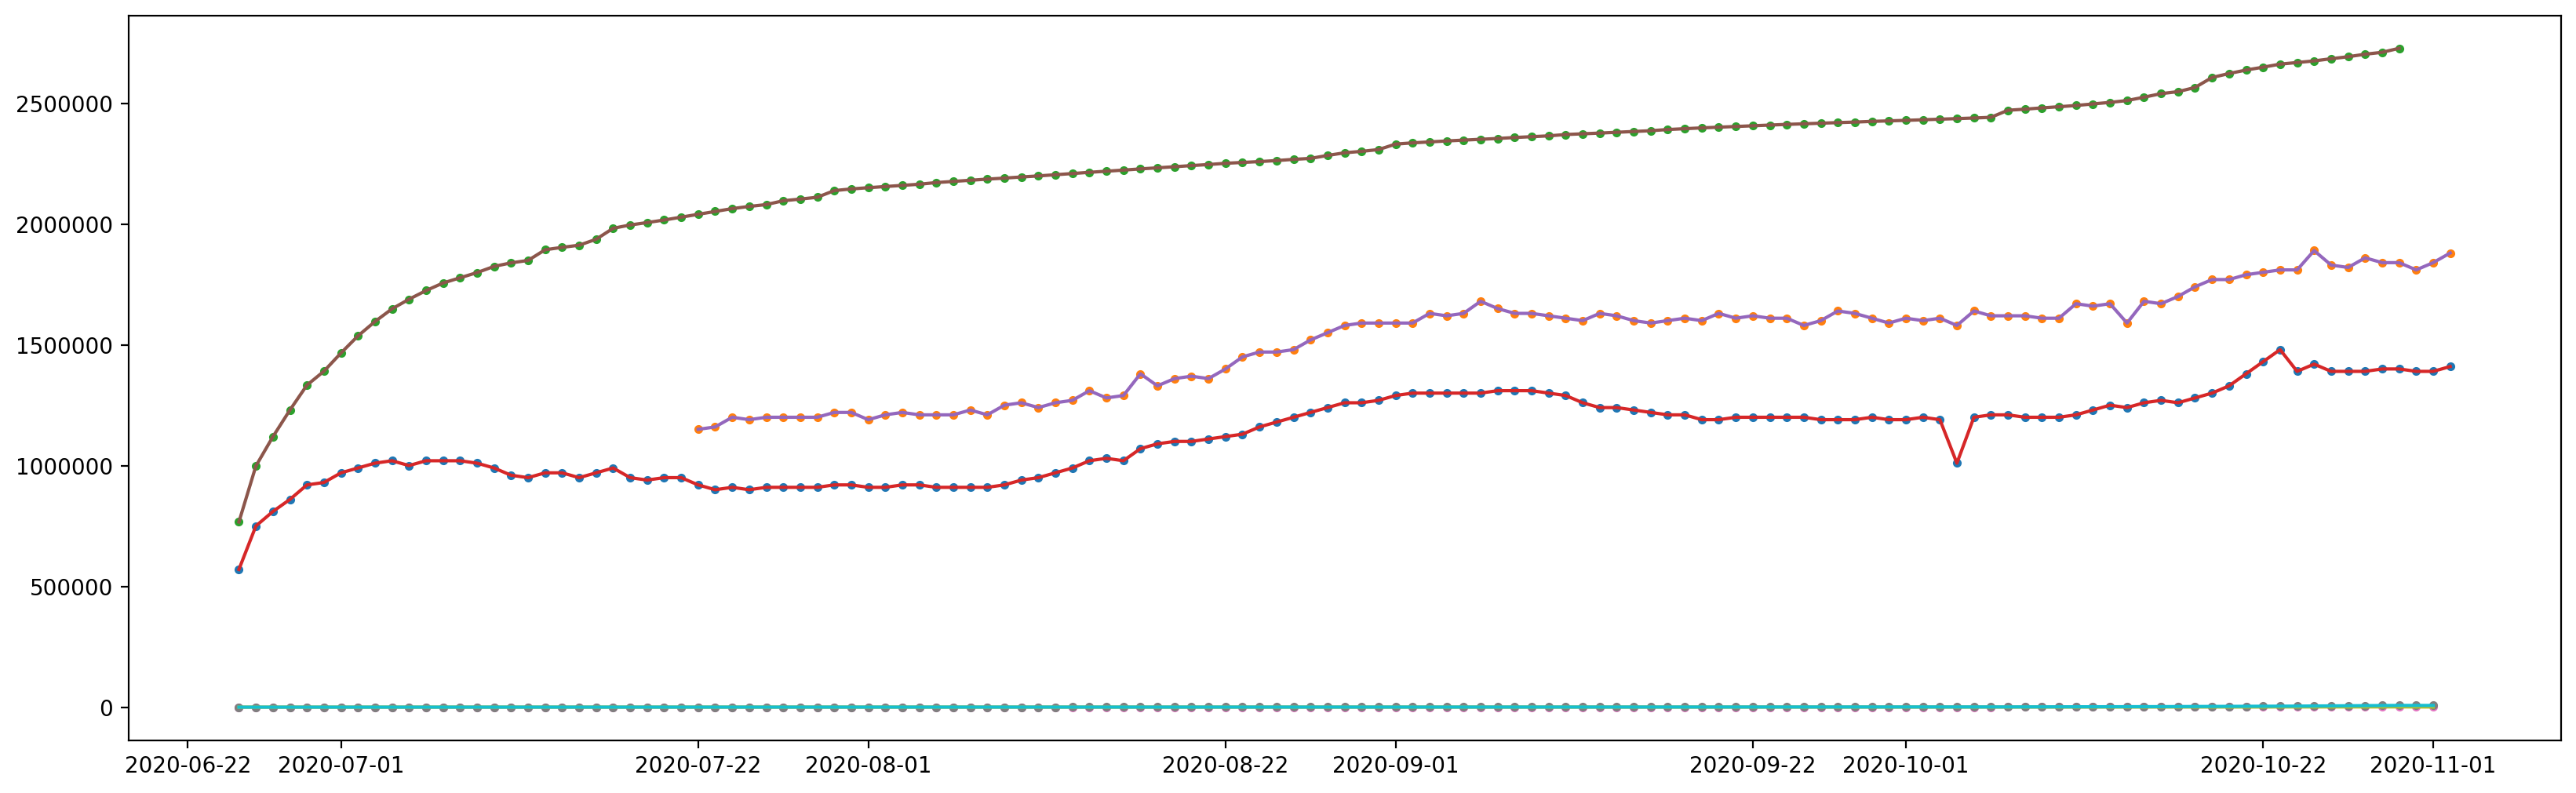

In [6]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)
#get the last entry
def sp(u):
   return float(u.split("-")[-1])
#coronapp  totals
url = 'https://www.bfs.admin.ch/bfsstatic/dam/assets/13407769/master'
swisscovidM = pd.read_csv(url, error_bad_lines = False, header=0, index_col=0, parse_dates=True, squeeze=True)

url = 'https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv'
swissM = pd.read_csv(url, error_bad_lines = False, header=0, index_col=0, parse_dates=True, squeeze=True)
display(swissM.tail(50))

#swiss=swissM.groupby(['date', 'time','abbreviation_canton_and_fl'])['ncumul_conf'].sum().reset_index()
plt.figure(1)
swiss=swissM.groupby(
     ['date']
 ).agg(
     sum_ncumul_conf = ('ncumul_conf','sum')
 )
plt.plot(swiss,'.')

plt.figure(2)
swissd=swissM.groupby(
     ['date']
 ).agg(
    sum_ncumul_dec = ('ncumul_deceased','sum')
 )
plt.plot(swissd,'.')


#calculate new cases from cumulated cases
plt.figure(3)
swisscovid = swisscovidM[swisscovidM.columns[[0,1,2]]]
plt.plot(swisscovid,'.')
plt.plot(swisscovid,'-')
plt.figure(3)
swisscovid = swisscovidM[swisscovidM.columns[[3,4]]]
plt.plot(swisscovid,'.')
plt.plot(swisscovid,'-')
pyplot.show()
